# Flight Price Prediction

#### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV

### Data  Collection
#### Read Dataset

In [5]:
train = pd.read_excel('C:/Users/MRANAL/Desktop/Projects/Flight Price Prediction/train.xlsx')

In [6]:
df_train = pd.DataFrame(data = train)
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


#### Shape of dataset

In [7]:
df_train.shape

(10683, 11)

### Exploratory Data Analysis

#### Unique value in each column

In [8]:
print(df_train['Total_Stops'].value_counts())
print('--'*44)
print(df_train['Additional_Info'].value_counts())
print('--'*44)
print(df_train['Source'].value_counts())
print('--'*44)
print(df_train['Destination'].value_counts())
print('--'*44)
print(df_train['Airline'].value_counts())

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64
----------------------------------------------------------------------------------------
No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64
----------------------------------------------------------------------------------------
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
----------------------------------------------------------------------------------------
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata 

#### Null values

In [9]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

#### Drop NaN values

In [10]:
df_train.dropna(inplace=True)

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


## Data Visualisation

#### Target Feature

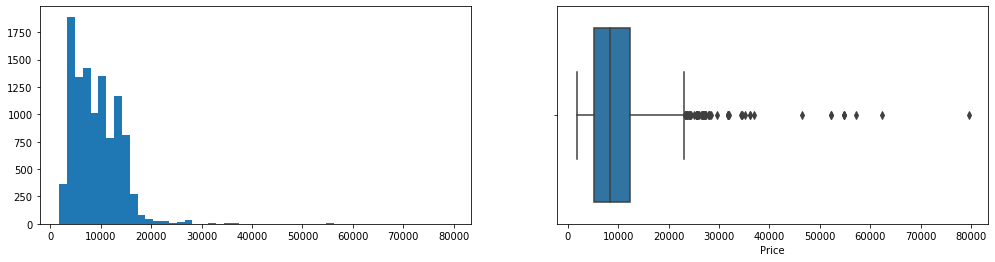

In [26]:
fig,(ax1, ax2) = plt.subplots(1, 2, figsize = (17,4))
ax1.hist(df_train['Price'], bins = 50)
sns.boxplot(df_train['Price'], ax = ax2)
plt.show()

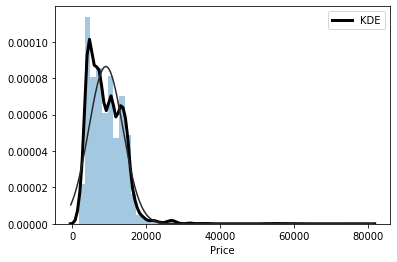

In [49]:
from scipy.stats import norm
sns.distplot(df_train['Price'], fit = norm, kde_kws={"color": "k", "lw": 3, "label": "KDE"})

#### Box Plot

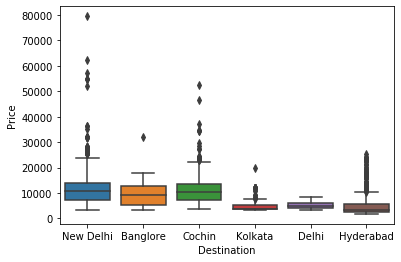

In [52]:
sns.boxplot(x = 'Destination', y = 'Price', data = df_train)

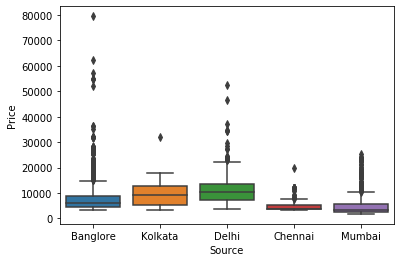

In [51]:
sns.boxplot(x = 'Source', y = 'Price', data = df_train)

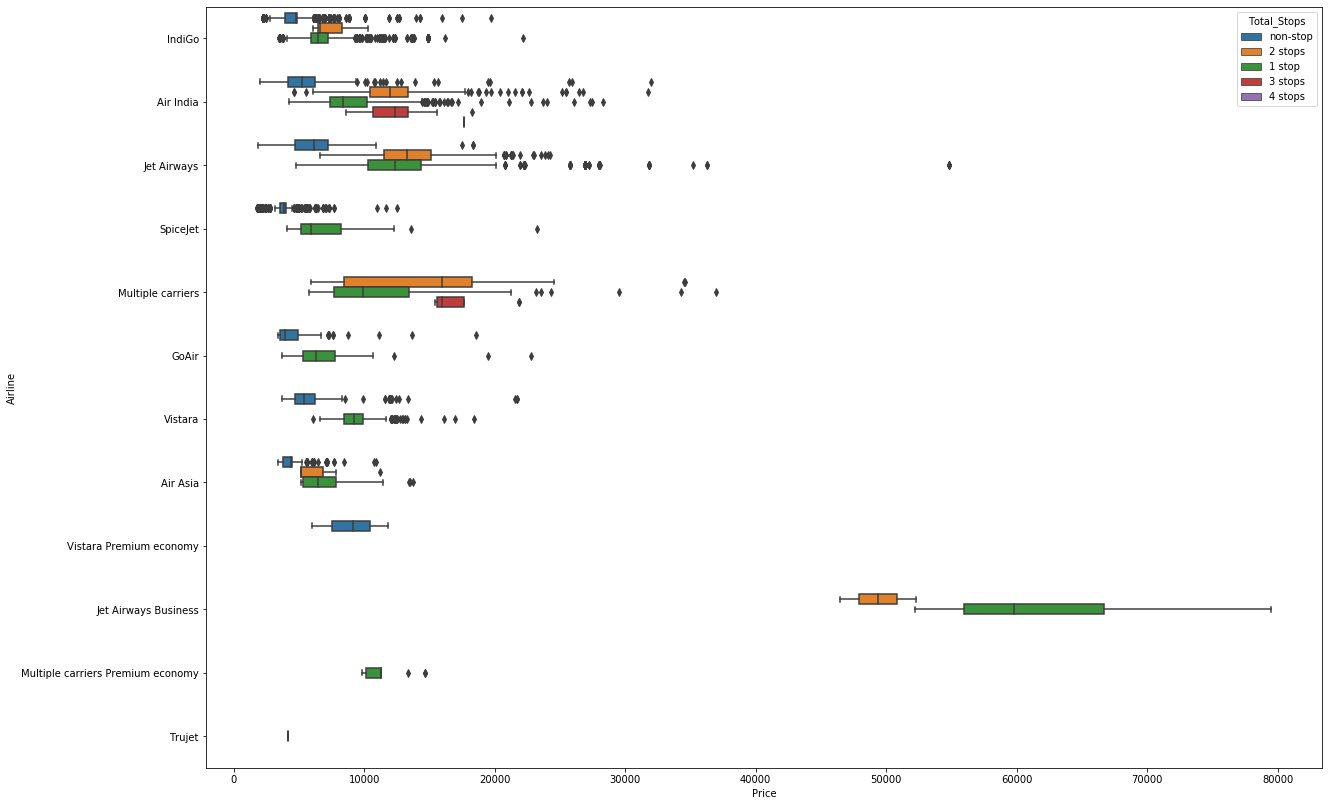

In [83]:
plt.figure(figsize = (20, 14))
sns.boxplot(y = 'Airline', x = 'Price', hue = 'Total_Stops',data = df_train)

#### Count Plot

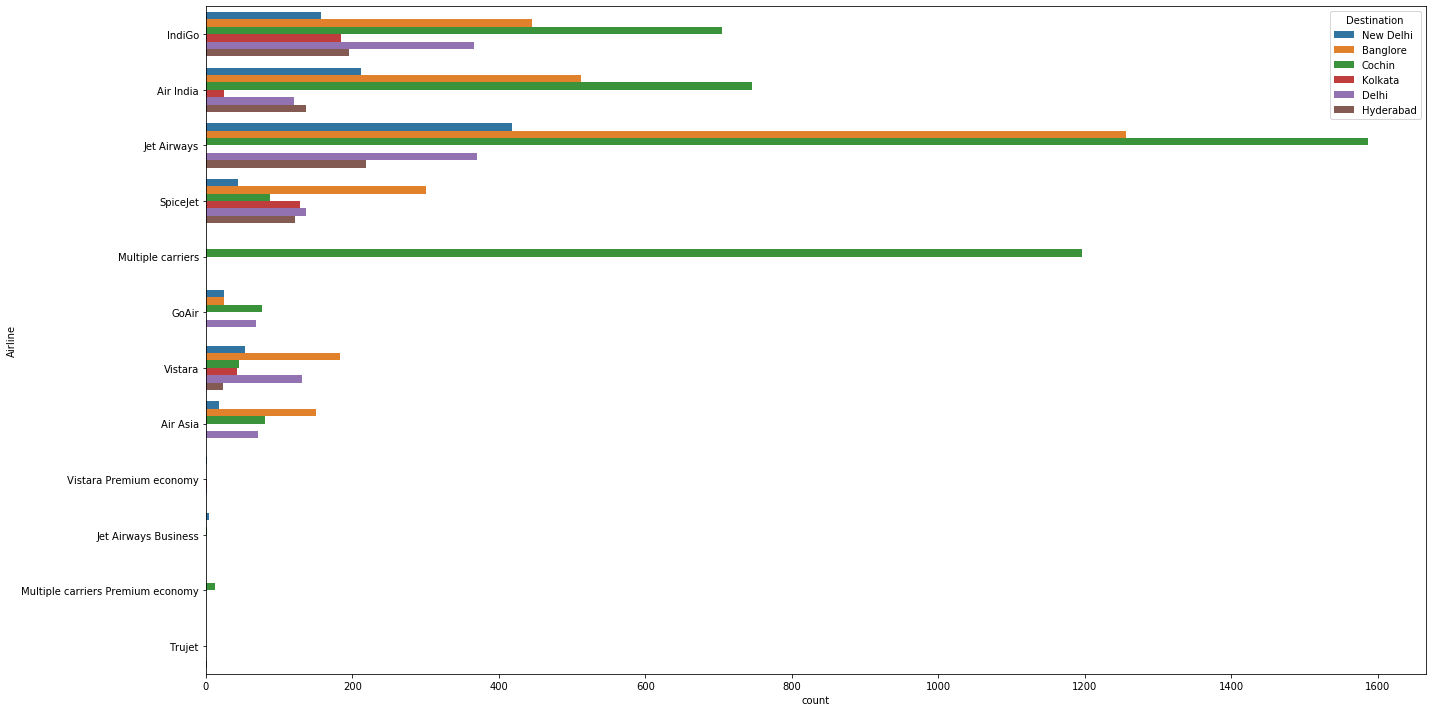

In [68]:
plt.figure(figsize= (20,10))
sns.countplot(y = 'Airline', hue='Destination',data = df_train)
plt.tight_layout()

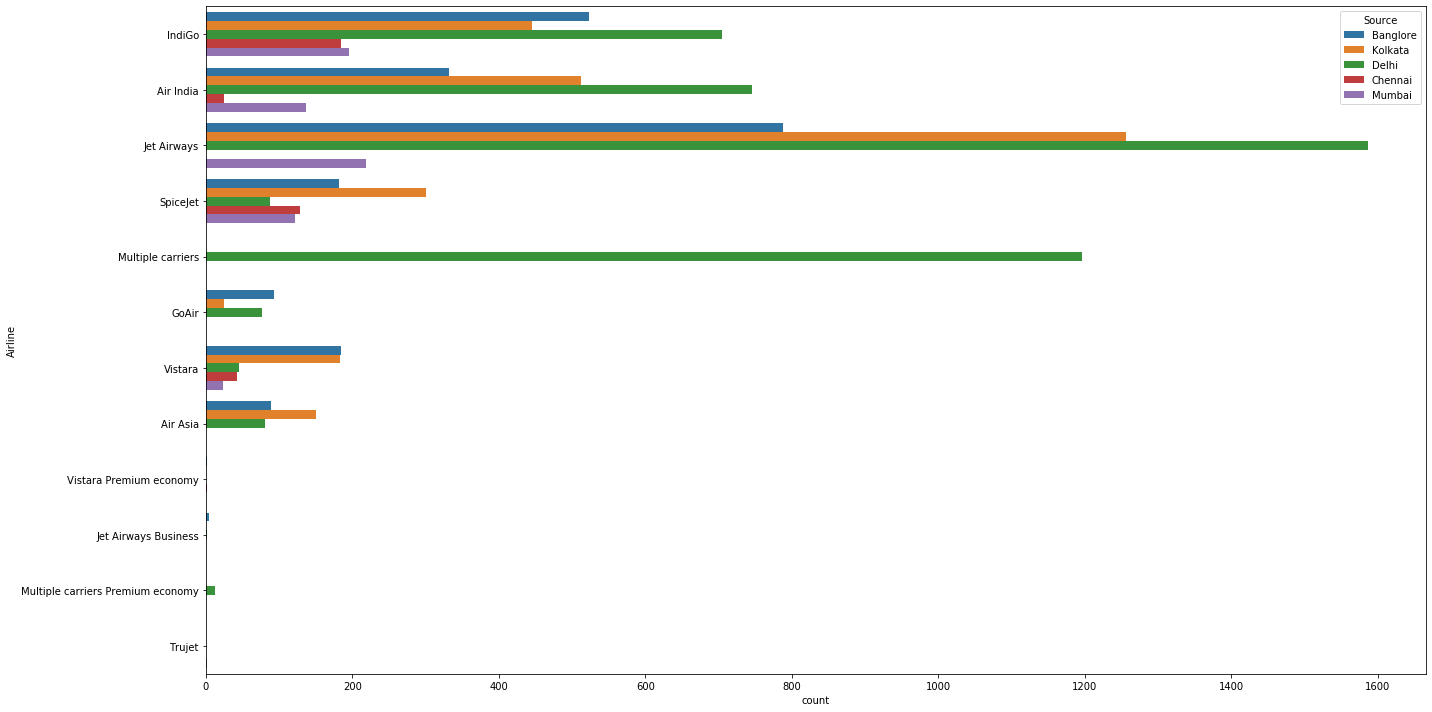

In [69]:
plt.figure(figsize= (20,10))
sns.countplot(y = 'Airline', hue='Source',data = df_train)
plt.tight_layout()

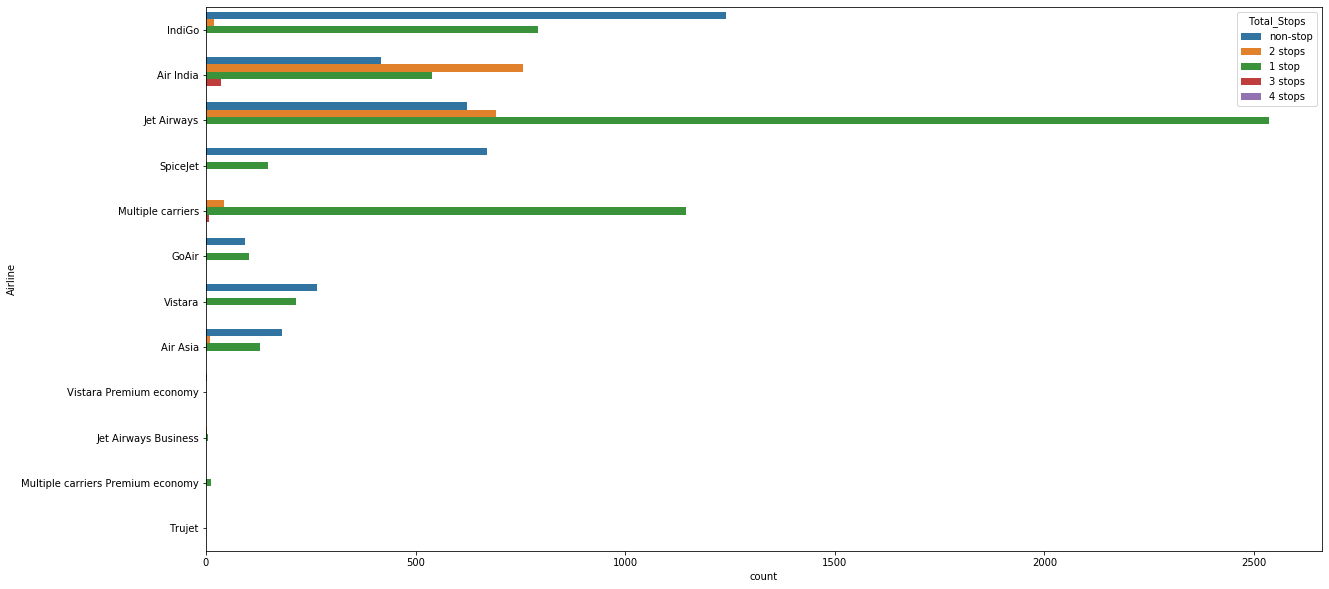

In [73]:
plt.figure(figsize = (20, 10))
sns.countplot(y = 'Airline', hue = 'Total_Stops', data = df_train)

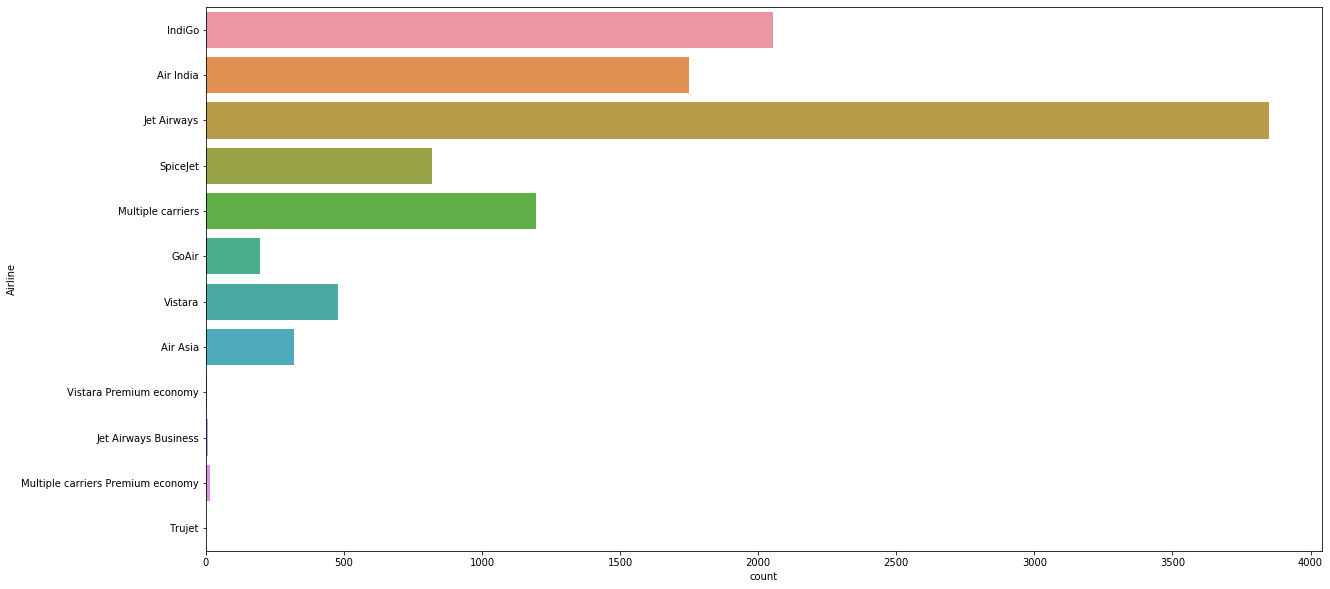

In [74]:
plt.figure(figsize = (20, 10))
sns.countplot(y  = 'Airline', data = df_train)

#### Boxen Plot

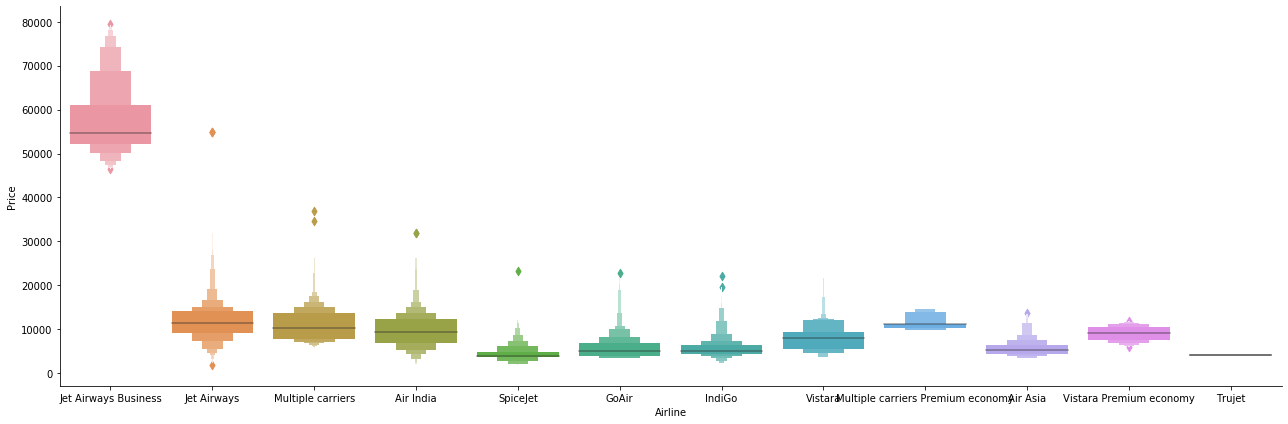

In [84]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = df_train.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)

#### Bar Plot

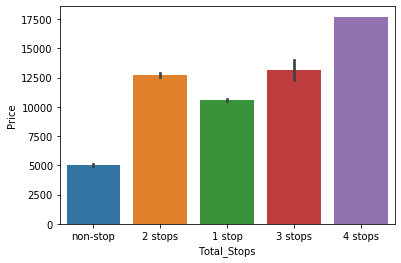

In [85]:
# Total_Stops vs Price
sns.barplot(x = 'Total_Stops', y = 'Price', data = df_train)

## Data Preprocessing 

In above analysis we can see some columns contain data related to date and time, but the datatype of some columns are wrongly defined, lets defined proper datatypes to the columns.

In [86]:
# Date_of_Journey is defined as object datatype, but the data it contain is of date type.
# here we will convert the object data type into int type using to_datetime() method.
df_train['Journey_Day'] = pd.to_datetime(df_train.Date_of_Journey, format="%d/%m/%Y").dt.day
df_train['Journey_Month'] = pd.to_datetime(df_train.Date_of_Journey, format="%d/%m/%Y").dt.month

In [87]:
# so we have converted  Date_of_Journey to int datatype, so no use of this coloumn now lets drop this column.
df_train.drop(['Date_of_Journey'], axis = 1, inplace=True)

In [88]:
# Departure Time is also defined as an object dataType, Lets convert it into int using the same method we used for Date_of_Journey
df_train['Dep_Hour'] = pd.to_datetime(df_train.Dep_Time).dt.hour
df_train['Dep_Minute'] = pd.to_datetime(df_train.Dep_Time).dt.minute

In [89]:
# as we converted Departure Time  into int data type, so there no use of this column lets drop it.
df_train.drop(['Dep_Time'], axis = 1, inplace = True)

In [90]:
# As we done with departure time column lets do same with arrival time , lets convert it into proper format.
df_train['Arrival_Hour'] = pd.to_datetime(df_train.Arrival_Time).dt.hour
df_train['Arrival_Minute'] = pd.to_datetime(df_train.Arrival_Time).dt.minute

In [91]:
# Lets drop the column 
df_train.drop(['Arrival_Time'], axis=1, inplace=True)

In [92]:
# Lets replace the categorical value into numerical for better understanding.

df_train['Total_Stops'].replace(['1 stop','non-stop','2 stops','3 stops','4 stops'],[1,0,2,3,4], inplace=True,)

In [93]:
df_train['Total_Stops'].value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [94]:
df_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302,1,3,16,50,21,35


In [95]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
# Lets drop the both features
df_train.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [96]:
df_train.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,16,50,21,35


In [97]:
# Time taken by plane to reach destination is called Duration
# It is the differnce between Departure Time and Arrival time


# Assigning and converting Duration column into list
dur = list(df_train["Duration"])

for i in range(len(dur)):
    if len(dur[i].split()) != 2:    # Check if Duration contains only hour or mins
        if "h" in dur[i]:
            dur[i] = dur[i].strip() + " 0m"   # Adds 0 minute
        else:
            dur[i] = "0h " + dur[i]           # Adds 0 hour

dur_hours = []
dur_mins = []
for i in range(len(dur)):
    dur_hours.append(int(dur[i].split(sep = "h")[0]))    # Extract hours from Duration
    dur_mins.append(int(dur[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from Duration

In [98]:
# here we will store the lists into out new columns like Duration_Hours and Duration_Minutes
df_train['Duration_Hours'] = dur_hours
df_train['Duration_Minutes'] = dur_mins

In [99]:
# As we taken seperate column for duration hour and minutes, so we no need of Duration column, lets drop it.
df_train.drop('Duration', axis = 1, inplace = True)

In [100]:
# Now lets play with categorical variable.
# here we will convert multiple categorical variable into dummy variable and then delete those 
#previous columns in one line of code. 

df_train = pd.get_dummies(data = df_train, columns = ['Airline','Source','Destination'], drop_first=True)

In [101]:
df_train.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [102]:
df_train.shape

(10682, 30)

### Feature Selection

In [105]:
X = df_train.drop(['Price'], axis = 1)
y = df_train['Price']

In [106]:
feature_imp = ExtraTreesRegressor()
feature_imp.fit(X, y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [107]:
feature_imp.feature_importances_

array([2.25524753e-01, 1.43429438e-01, 5.40622725e-02, 2.44379606e-02,
       2.14232539e-02, 2.72979421e-02, 1.92256393e-02, 1.14568684e-01,
       1.77971848e-02, 9.47579202e-03, 1.75918992e-03, 1.87552667e-02,
       1.42007426e-01, 6.72788701e-02, 1.90048923e-02, 8.79911489e-04,
       2.98001491e-03, 9.44231291e-05, 5.27401613e-03, 7.95201126e-05,
       4.52636607e-04, 1.17619445e-02, 3.44530824e-03, 8.42062948e-03,
       1.03036738e-02, 1.86123532e-02, 6.19089904e-03, 5.21171664e-04,
       2.49349318e-02])

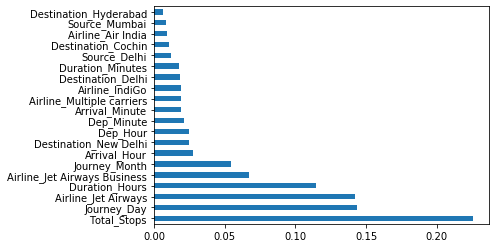

In [108]:
featur = pd.Series(data = feature_imp.feature_importances_, index = X.columns)
featur.nlargest(20).plot(kind = 'barh')

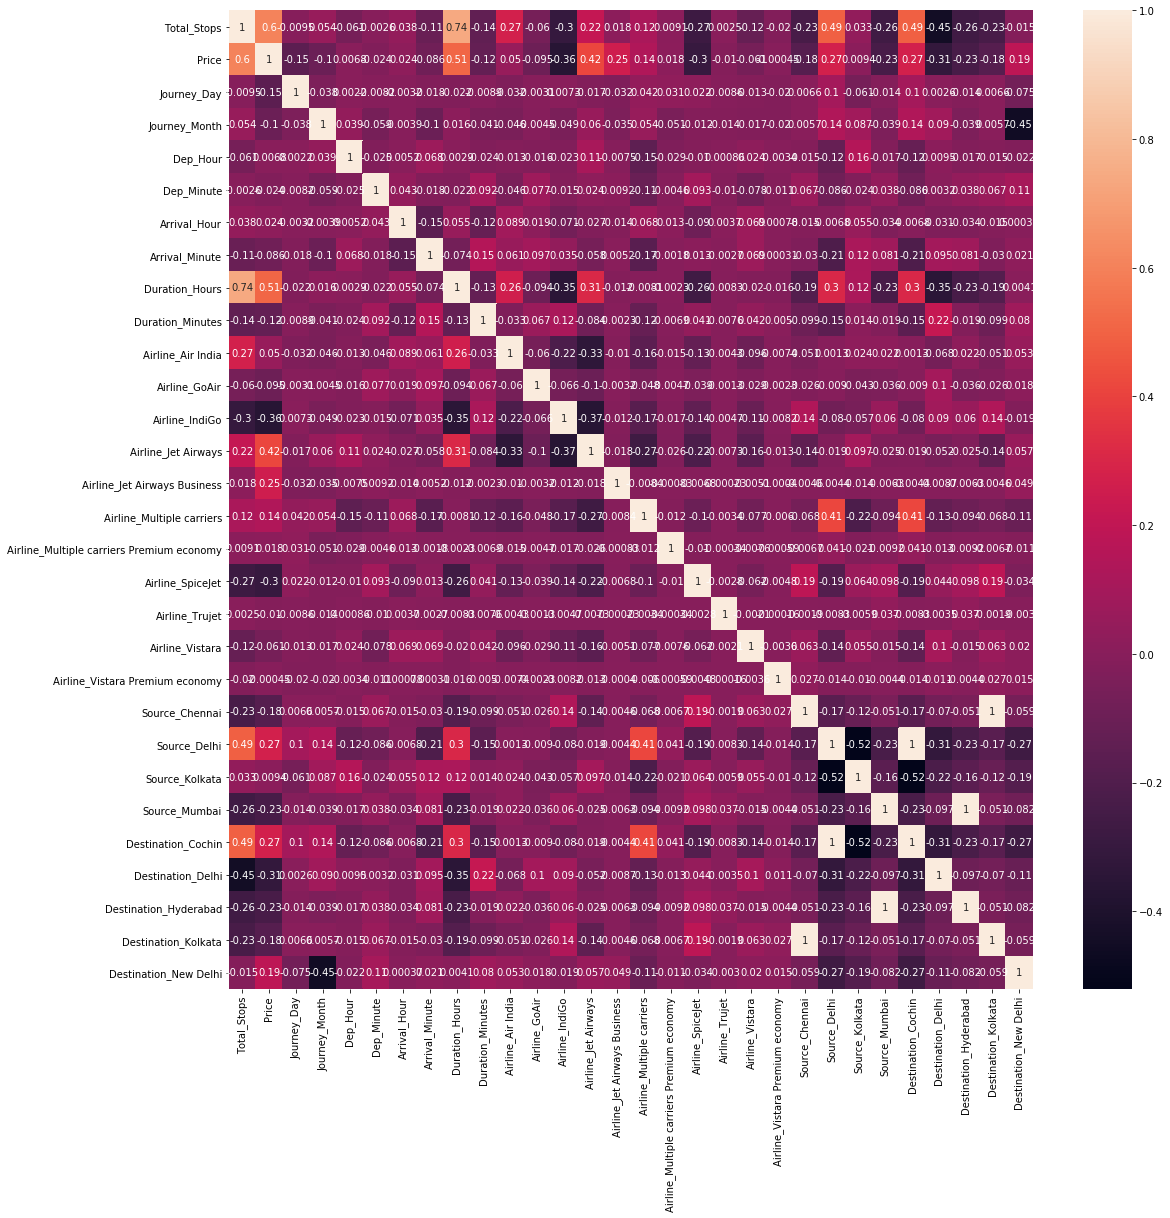

In [109]:
plt.figure(figsize=(18,18))
sns.heatmap(df_train.corr(), annot=True)
plt.show()

#### Split the data into train and test set

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Model Selection 

In [111]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [112]:
y_pred = xgb.predict(X_test)

#### Training Accuracy

In [113]:
xgb.score(X_train, y_train)

0.9353790824718483

#### Test Accuracy

In [114]:
xgb.score(X_test, y_test)

0.8463321179668919

In [115]:
r2_score(y_pred, y_test)

0.8174090654871674

Here we can see the XGBoost Regressor is giving 81 % of accuracy as compare to other model xgboost is best for this problem statement.

We can also see the accuracy of train and test data, accuracy for train data is 93 % and accuracy for test data is 84 %, its just amazing result. 

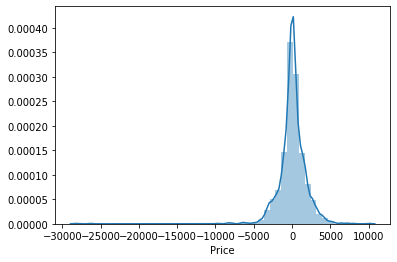

In [116]:
sns.distplot(y_pred - y_test)

Here we can see our data is normally distributed, by looking this result we can say that, there is no   more difference between predicted output and actual output. The error rate is minimum.

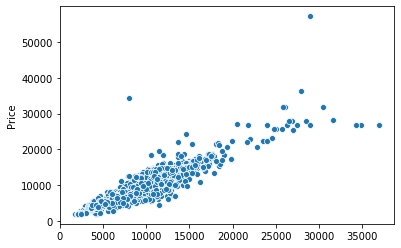

In [117]:
sns.scatterplot(y_pred, y_test)

### Model Evaluation

In [118]:
print('Mean Squared Error :', mean_squared_error(y_pred, y_test))
print('Mean Absolute Error :', mean_absolute_error(y_pred, y_test))
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(y_pred, y_test)))

Mean Squared Error : 3313395.5276125227
Mean Absolute Error : 1135.7739130429816
Root Mean Squared Error : 1820.273476050377


### Hyperparameter Tuningm

In [150]:
parameter = {'n_estimators':[100, 200, 400, 600, 800, 1000, 1200],
             'max_depth':[2,3,5,6,7,8,10,15],
             'max_delta_step':[0,1,3,5,6,8,10],
             'min_child_weight':[1,2,4,6,8,10]}

xgboost = XGBRegressor()
random_search = RandomizedSearchCV(xgboost, param_distributions = parameter, n_iter=100, scoring='neg_mean_squared_error', n_jobs=1, cv=5, random_state = 42, verbose = 2)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=100, min_child_weight=8, max_depth=10, max_delta_step=8 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, min_child_weight=8, max_depth=10, max_delta_step=8, total=   0.9s
[CV] n_estimators=100, min_child_weight=8, max_depth=10, max_delta_step=8 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  n_estimators=100, min_child_weight=8, max_depth=10, max_delta_step=8, total=   0.8s
[CV] n_estimators=100, min_child_weight=8, max_depth=10, max_delta_step=8 
[CV]  n_estimators=100, min_child_weight=8, max_depth=10, max_delta_step=8, total=   0.7s
[CV] n_estimators=100, min_child_weight=8, max_depth=10, max_delta_step=8 
[CV]  n_estimators=100, min_child_weight=8, max_depth=10, max_delta_step=8, total=   0.9s
[CV] n_estimators=100, min_child_weight=8, max_depth=10, max_delta_step=8 
[CV]  n_estimators=100, min_child_weight=8, max_depth=10, max_delta_step=8, total=   0.9s
[CV] n_estimators=600, min_child_weight=10, max_depth=15, max_delta_step=1 
[CV]  n_estimators=600, min_child_weight=10, max_depth=15, max_delta_step=1, total=   4.5s
[CV] n_estimators=600, min_child_weight=10, max_depth=15, max_delta_step=1 
[CV]  n_estimators=600, min_child_weight=10, max_depth=15, max_delta_step=1, total=   5.3s
[CV] n_estimators=600, min_child_weight=10, max_depth=15, max_delta_step=1 
[CV] 

[CV]  n_estimators=1200, min_child_weight=2, max_depth=3, max_delta_step=10, total=   7.3s
[CV] n_estimators=1200, min_child_weight=2, max_depth=3, max_delta_step=10 
[CV]  n_estimators=1200, min_child_weight=2, max_depth=3, max_delta_step=10, total=   7.4s
[CV] n_estimators=1200, min_child_weight=2, max_depth=3, max_delta_step=10 
[CV]  n_estimators=1200, min_child_weight=2, max_depth=3, max_delta_step=10, total=   6.9s
[CV] n_estimators=1200, min_child_weight=2, max_depth=3, max_delta_step=10 
[CV]  n_estimators=1200, min_child_weight=2, max_depth=3, max_delta_step=10, total=   6.7s
[CV] n_estimators=200, min_child_weight=1, max_depth=8, max_delta_step=8 
[CV]  n_estimators=200, min_child_weight=1, max_depth=8, max_delta_step=8, total=   1.2s
[CV] n_estimators=200, min_child_weight=1, max_depth=8, max_delta_step=8 
[CV]  n_estimators=200, min_child_weight=1, max_depth=8, max_delta_step=8, total=   1.2s
[CV] n_estimators=200, min_child_weight=1, max_depth=8, max_delta_step=8 
[CV]  n_

[CV]  n_estimators=1200, min_child_weight=2, max_depth=15, max_delta_step=3, total=  12.3s
[CV] n_estimators=1200, min_child_weight=2, max_depth=15, max_delta_step=3 
[CV]  n_estimators=1200, min_child_weight=2, max_depth=15, max_delta_step=3, total=  12.0s
[CV] n_estimators=1200, min_child_weight=2, max_depth=15, max_delta_step=3 
[CV]  n_estimators=1200, min_child_weight=2, max_depth=15, max_delta_step=3, total=   9.8s
[CV] n_estimators=1200, min_child_weight=2, max_depth=15, max_delta_step=3 
[CV]  n_estimators=1200, min_child_weight=2, max_depth=15, max_delta_step=3, total=  12.2s
[CV] n_estimators=1200, min_child_weight=10, max_depth=3, max_delta_step=10 
[CV]  n_estimators=1200, min_child_weight=10, max_depth=3, max_delta_step=10, total=  12.9s
[CV] n_estimators=1200, min_child_weight=10, max_depth=3, max_delta_step=10 
[CV]  n_estimators=1200, min_child_weight=10, max_depth=3, max_delta_step=10, total=  15.3s
[CV] n_estimators=1200, min_child_weight=10, max_depth=3, max_delta_st

[CV]  n_estimators=1000, min_child_weight=4, max_depth=8, max_delta_step=0, total=  28.6s
[CV] n_estimators=1000, min_child_weight=4, max_depth=8, max_delta_step=0 
[CV]  n_estimators=1000, min_child_weight=4, max_depth=8, max_delta_step=0, total=  33.4s
[CV] n_estimators=1000, min_child_weight=4, max_depth=8, max_delta_step=0 
[CV]  n_estimators=1000, min_child_weight=4, max_depth=8, max_delta_step=0, total=  37.3s
[CV] n_estimators=1000, min_child_weight=4, max_depth=8, max_delta_step=0 
[CV]  n_estimators=1000, min_child_weight=4, max_depth=8, max_delta_step=0, total=  27.7s
[CV] n_estimators=100, min_child_weight=8, max_depth=3, max_delta_step=5 
[CV]  n_estimators=100, min_child_weight=8, max_depth=3, max_delta_step=5, total=   1.2s
[CV] n_estimators=100, min_child_weight=8, max_depth=3, max_delta_step=5 
[CV]  n_estimators=100, min_child_weight=8, max_depth=3, max_delta_step=5, total=   0.7s
[CV] n_estimators=100, min_child_weight=8, max_depth=3, max_delta_step=5 
[CV]  n_estimat

[CV]  n_estimators=100, min_child_weight=10, max_depth=8, max_delta_step=1, total=   0.8s
[CV] n_estimators=100, min_child_weight=10, max_depth=8, max_delta_step=1 
[CV]  n_estimators=100, min_child_weight=10, max_depth=8, max_delta_step=1, total=   0.8s
[CV] n_estimators=100, min_child_weight=10, max_depth=8, max_delta_step=1 
[CV]  n_estimators=100, min_child_weight=10, max_depth=8, max_delta_step=1, total=   0.9s
[CV] n_estimators=100, min_child_weight=10, max_depth=8, max_delta_step=1 
[CV]  n_estimators=100, min_child_weight=10, max_depth=8, max_delta_step=1, total=   0.8s
[CV] n_estimators=200, min_child_weight=2, max_depth=8, max_delta_step=0 
[CV]  n_estimators=200, min_child_weight=2, max_depth=8, max_delta_step=0, total=   4.6s
[CV] n_estimators=200, min_child_weight=2, max_depth=8, max_delta_step=0 
[CV]  n_estimators=200, min_child_weight=2, max_depth=8, max_delta_step=0, total=   4.4s
[CV] n_estimators=200, min_child_weight=2, max_depth=8, max_delta_step=0 
[CV]  n_estimat

[CV]  n_estimators=600, min_child_weight=1, max_depth=7, max_delta_step=1, total=   4.3s
[CV] n_estimators=600, min_child_weight=1, max_depth=7, max_delta_step=1 
[CV]  n_estimators=600, min_child_weight=1, max_depth=7, max_delta_step=1, total=   4.6s
[CV] n_estimators=600, min_child_weight=1, max_depth=7, max_delta_step=1 
[CV]  n_estimators=600, min_child_weight=1, max_depth=7, max_delta_step=1, total=   4.1s
[CV] n_estimators=600, min_child_weight=1, max_depth=7, max_delta_step=1 
[CV]  n_estimators=600, min_child_weight=1, max_depth=7, max_delta_step=1, total=   4.3s
[CV] n_estimators=800, min_child_weight=6, max_depth=5, max_delta_step=1 
[CV]  n_estimators=800, min_child_weight=6, max_depth=5, max_delta_step=1, total=   5.8s
[CV] n_estimators=800, min_child_weight=6, max_depth=5, max_delta_step=1 
[CV]  n_estimators=800, min_child_weight=6, max_depth=5, max_delta_step=1, total=   6.6s
[CV] n_estimators=800, min_child_weight=6, max_depth=5, max_delta_step=1 
[CV]  n_estimators=800

[CV]  n_estimators=400, min_child_weight=1, max_depth=3, max_delta_step=0, total=   3.9s
[CV] n_estimators=400, min_child_weight=1, max_depth=3, max_delta_step=0 
[CV]  n_estimators=400, min_child_weight=1, max_depth=3, max_delta_step=0, total=   3.9s
[CV] n_estimators=400, min_child_weight=1, max_depth=3, max_delta_step=0 
[CV]  n_estimators=400, min_child_weight=1, max_depth=3, max_delta_step=0, total=   3.9s
[CV] n_estimators=400, min_child_weight=1, max_depth=3, max_delta_step=0 
[CV]  n_estimators=400, min_child_weight=1, max_depth=3, max_delta_step=0, total=   3.9s
[CV] n_estimators=100, min_child_weight=4, max_depth=2, max_delta_step=3 
[CV]  n_estimators=100, min_child_weight=4, max_depth=2, max_delta_step=3, total=   0.7s
[CV] n_estimators=100, min_child_weight=4, max_depth=2, max_delta_step=3 
[CV]  n_estimators=100, min_child_weight=4, max_depth=2, max_delta_step=3, total=   0.6s
[CV] n_estimators=100, min_child_weight=4, max_depth=2, max_delta_step=3 
[CV]  n_estimators=100

[CV]  n_estimators=200, min_child_weight=2, max_depth=3, max_delta_step=10, total=   1.2s
[CV] n_estimators=200, min_child_weight=2, max_depth=3, max_delta_step=10 
[CV]  n_estimators=200, min_child_weight=2, max_depth=3, max_delta_step=10, total=   1.2s
[CV] n_estimators=200, min_child_weight=2, max_depth=3, max_delta_step=10 
[CV]  n_estimators=200, min_child_weight=2, max_depth=3, max_delta_step=10, total=   1.1s
[CV] n_estimators=200, min_child_weight=2, max_depth=3, max_delta_step=10 
[CV]  n_estimators=200, min_child_weight=2, max_depth=3, max_delta_step=10, total=   1.2s
[CV] n_estimators=100, min_child_weight=10, max_depth=2, max_delta_step=6 
[CV]  n_estimators=100, min_child_weight=10, max_depth=2, max_delta_step=6, total=   0.6s
[CV] n_estimators=100, min_child_weight=10, max_depth=2, max_delta_step=6 
[CV]  n_estimators=100, min_child_weight=10, max_depth=2, max_delta_step=6, total=   0.6s
[CV] n_estimators=100, min_child_weight=10, max_depth=2, max_delta_step=6 
[CV]  n_es

[CV]  n_estimators=800, min_child_weight=1, max_depth=6, max_delta_step=5, total=   4.5s
[CV] n_estimators=800, min_child_weight=1, max_depth=6, max_delta_step=5 
[CV]  n_estimators=800, min_child_weight=1, max_depth=6, max_delta_step=5, total=   4.5s
[CV] n_estimators=800, min_child_weight=1, max_depth=6, max_delta_step=5 
[CV]  n_estimators=800, min_child_weight=1, max_depth=6, max_delta_step=5, total=   5.0s
[CV] n_estimators=800, min_child_weight=1, max_depth=6, max_delta_step=5 
[CV]  n_estimators=800, min_child_weight=1, max_depth=6, max_delta_step=5, total=   5.2s
[CV] n_estimators=1200, min_child_weight=10, max_depth=7, max_delta_step=3 
[CV]  n_estimators=1200, min_child_weight=10, max_depth=7, max_delta_step=3, total=   9.4s
[CV] n_estimators=1200, min_child_weight=10, max_depth=7, max_delta_step=3 
[CV]  n_estimators=1200, min_child_weight=10, max_depth=7, max_delta_step=3, total=   8.0s
[CV] n_estimators=1200, min_child_weight=10, max_depth=7, max_delta_step=3 
[CV]  n_esti

[CV]  n_estimators=1200, min_child_weight=6, max_depth=15, max_delta_step=6, total=   6.7s
[CV] n_estimators=1200, min_child_weight=6, max_depth=15, max_delta_step=6 
[CV]  n_estimators=1200, min_child_weight=6, max_depth=15, max_delta_step=6, total=   7.1s
[CV] n_estimators=1200, min_child_weight=6, max_depth=15, max_delta_step=6 
[CV]  n_estimators=1200, min_child_weight=6, max_depth=15, max_delta_step=6, total=   6.7s
[CV] n_estimators=1200, min_child_weight=6, max_depth=15, max_delta_step=6 
[CV]  n_estimators=1200, min_child_weight=6, max_depth=15, max_delta_step=6, total=   6.9s
[CV] n_estimators=1000, min_child_weight=8, max_depth=8, max_delta_step=10 
[CV]  n_estimators=1000, min_child_weight=8, max_depth=8, max_delta_step=10, total=   5.6s
[CV] n_estimators=1000, min_child_weight=8, max_depth=8, max_delta_step=10 
[CV]  n_estimators=1000, min_child_weight=8, max_depth=8, max_delta_step=10, total=   5.6s
[CV] n_estimators=1000, min_child_weight=8, max_depth=8, max_delta_step=10

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 50.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_...
                                          validate_parameters=False,
                                          verbosity=None),
                   iid='deprecated', n_iter=100, n_jobs=1,
   

In [151]:
random_search.best_estimator_

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=400, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [152]:
random_search.best_params_

{'n_estimators': 400,
 'min_child_weight': 1,
 'max_depth': 3,
 'max_delta_step': 0}

In [243]:
hyperXGB = XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=3,
             min_child_weight=1, monotone_constraints=None,
             n_estimators=400, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)
hyperXGB.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=400, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [244]:
hyperXGB_pred = hyperXGB.predict(X_test)

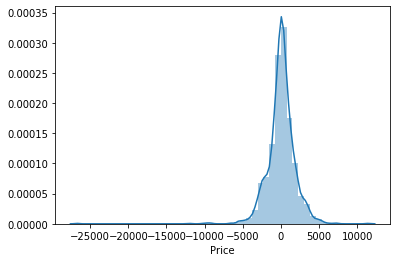

In [245]:
sns.distplot(hyperXGB_pred - y_test)

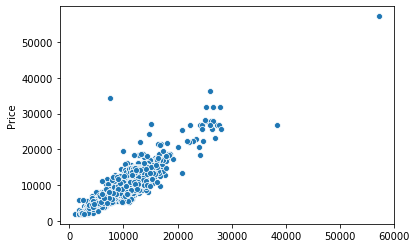

In [246]:
sns.scatterplot(hyperXGB_pred, y_test)

In [247]:
r2_score(hyperXGB_pred, y_test)

0.8179595881328744

In [248]:
hyperXGB.score(X_train, y_train)

0.880199447669894

In [249]:
hyperXGB.score(X_test, y_test)

0.8448118229929282

In [250]:
### Model Evaluation
print('Mean Squared Error :', mean_squared_error(hyperXGB_pred, y_test))
print('Mean Absolute Error :', mean_absolute_error(hyperXGB_pred, y_test))
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(hyperXGB_pred, y_test)))

Mean Squared Error : 3346176.2134704674
Mean Absolute Error : 1241.6051502361663
Root Mean Squared Error : 1829.255644646332


### Save the model to Pickle File

In [39]:
import pickle
# Saving model to disk
pickle.dump(xgb, open('xgb.pkl','wb'))